<h1>Import the Libraries</h1>

In [2]:
import numpy as np 
import pandas as pd 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt

<h2>Reading and Understanding data</h2>

In [73]:
cars = pd.read_csv("D:\DL material\ML projects\Car Price Projects\CarPrice_Assignment.csv")
cars_copy = cars.copy()

In [74]:
#deleting some entries from the dataset
carslength = cars['carlength']
citympg = cars['citympg']
for x in range(0,204,2):
    carslength[x] = float("NAN")
    citympg[x] = float("NAN")
cars_copy['carlength'] = carslength
cars_copy['citympg'] = citympg
cars = cars_copy

C:\Users\muham\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\muham\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\muham\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,NaN,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,NaN,22,17450.0


In [76]:
cars.info()
#missing data in carslength and citympg 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         103 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [77]:
cars.shape

(205, 26)

In [78]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,103.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,103.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.996117,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,24.165049,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.029049,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,5.874667,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,144.600000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,168.700000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.600000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,184.050000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,27.500000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,38.000000,54.000000,45400.000000


In [79]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002953705A4C8>,
      dtype=object)

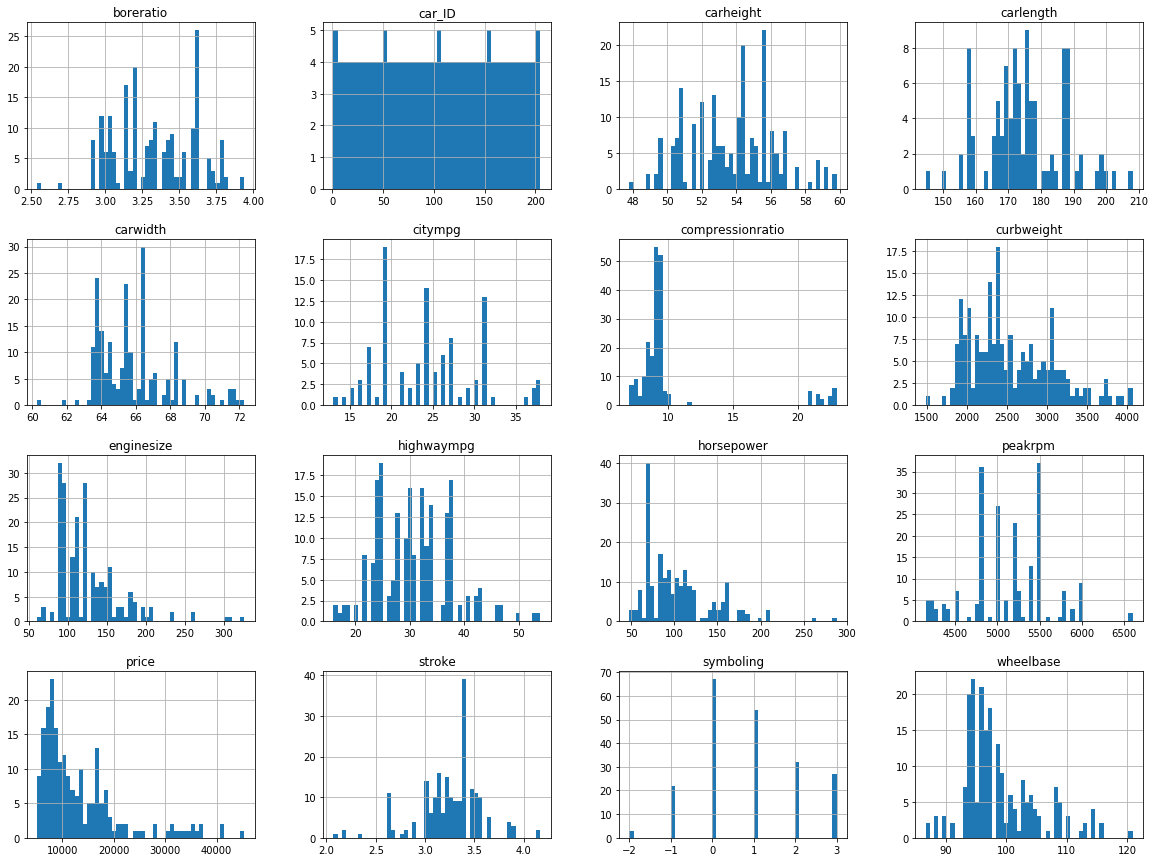

In [80]:
#plotting histogram 
cars.hist(bins=50 , figsize = (20,15))

<h2>Correcting Spelling Error of company</h2>

In [81]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,NaN,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,NaN,22,17450.0


In [82]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [83]:
#correcting spelling error 
cars.CompanyName = cars.CompanyName.str.lower()
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Discover and visualize the data to gain insights

In [84]:
#making copy of strat_train_set for visualization
cars_viz = cars.copy()

In [85]:
correlation = cars_viz.corr()
correlation['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.697759
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
highwaympg         -0.697599
citympg            -0.722506
Name: price, dtype: float64

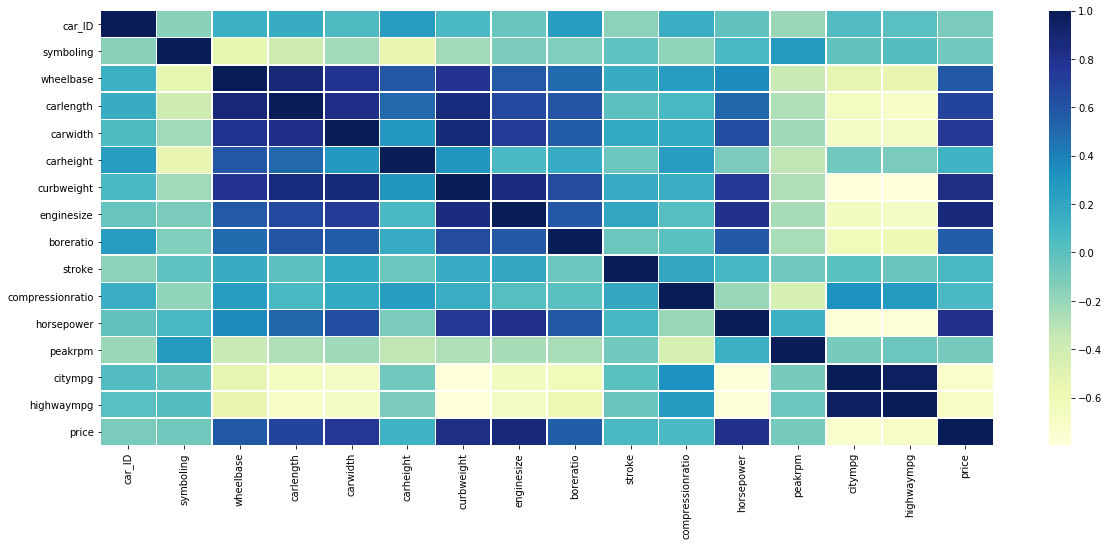

In [86]:
plt.figure(figsize = (20,8))
sns.heatmap(correlation,linewidths=.5,cmap="YlGnBu")

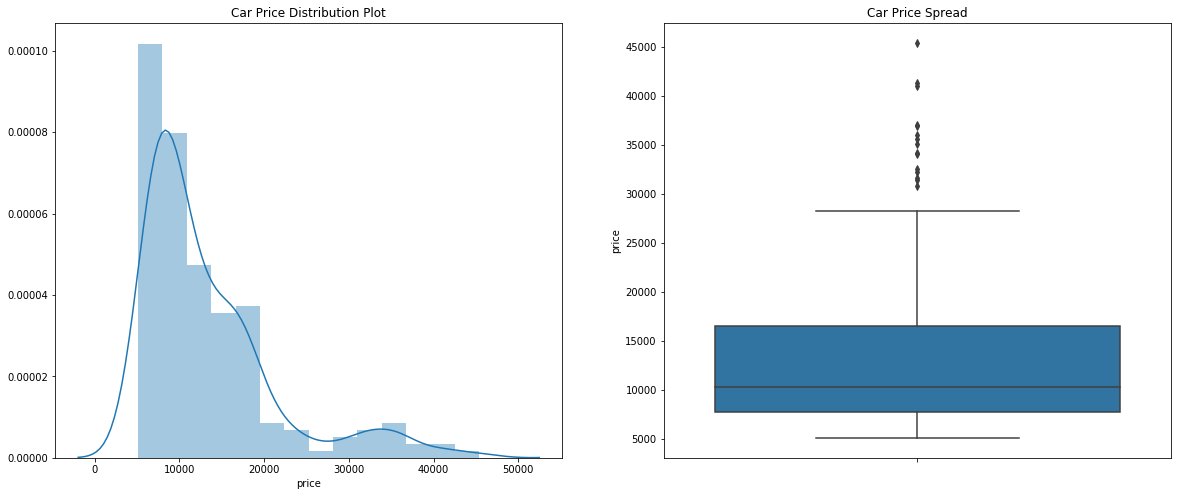

In [87]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_viz.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_viz.price)

plt.show()

In [88]:
print(cars_viz.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


<ul>
<li>The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000)</li>
<li>85% of the price are below 18530 Rs. and only 15% of the price is between 18,530 and 45,400</li>
</ul>


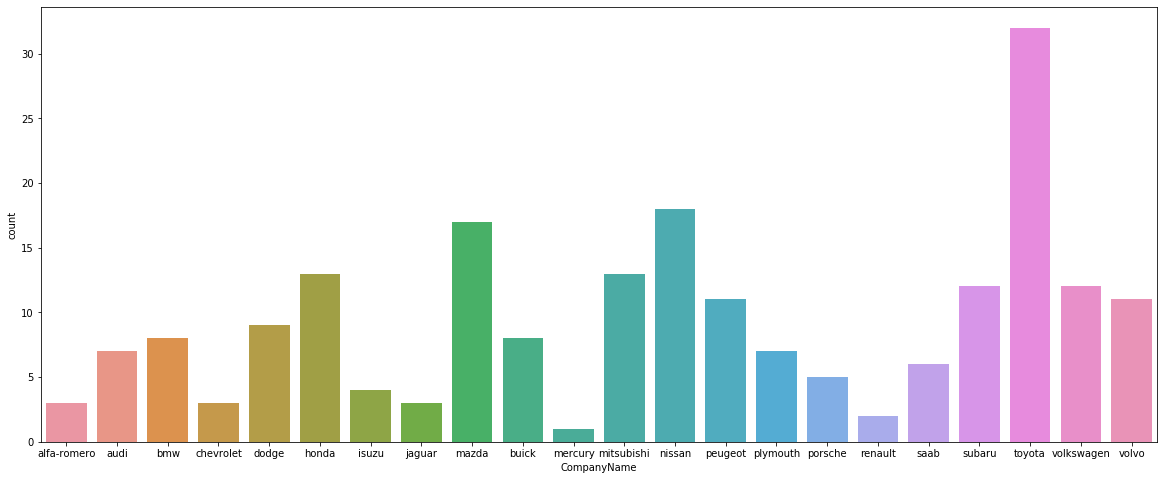

In [89]:
plt.figure(figsize = (20,8))
sns.countplot(x = cars_viz['CompanyName'])

<h2>Visualising Categorical Data </h2>
- CompanyName<br/>
- Symboling<br/>
- fueltype<br/>
- enginetype<br/>
- carbody<br/>
- doornumber<br/>
- enginelocation<br/>
- fuelsystem<br/>
- cylindernumber<br/>
- aspiration<br/>
- drivewheel<br/>

In [90]:
def plot_count(x):
    plt.figure(figsize = (20,8))
    plt.subplot(1,2,1)
    sns.countplot(cars_viz[x])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = cars_viz[x] , y = cars_viz['price'])
    
    df = pd.DataFrame(cars_viz.groupby([x])['price'].mean().sort_values(ascending = False))
    df.plot.bar(figsize=(8,6))
    plt.title(x + ' vs Average Price')
    plt.show()

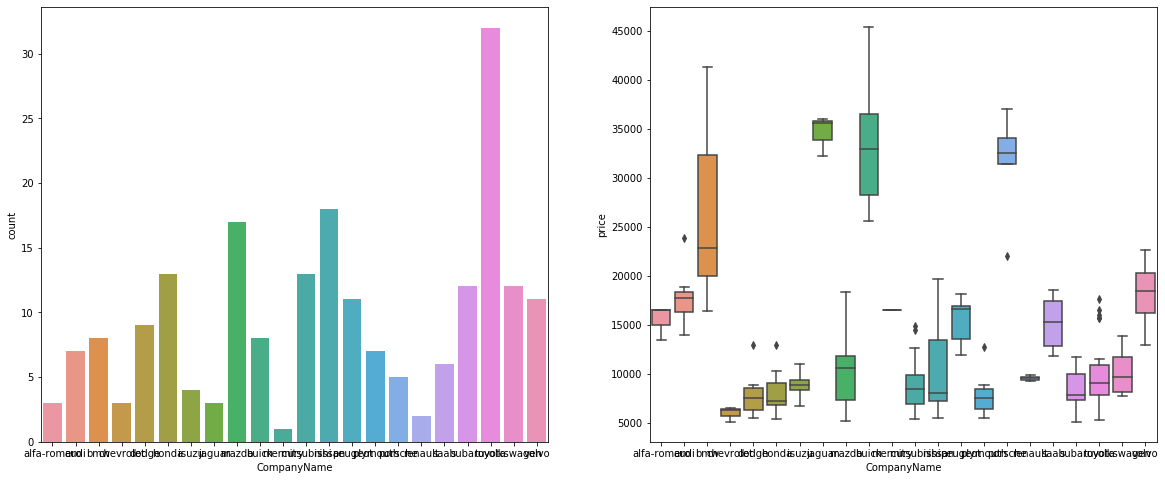

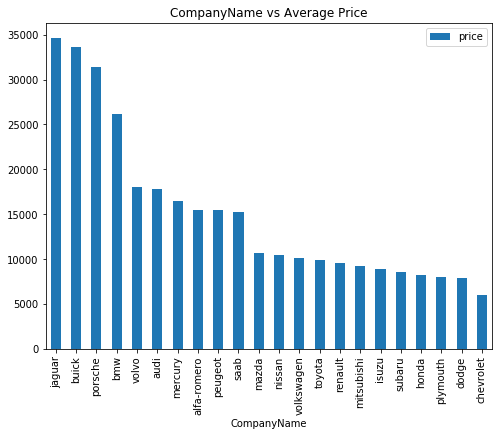

In [91]:
plot_count('CompanyName')

1. Toyota is the most preferred car <br/>
2. Jaguar, buick and porsche are the most expensive cars


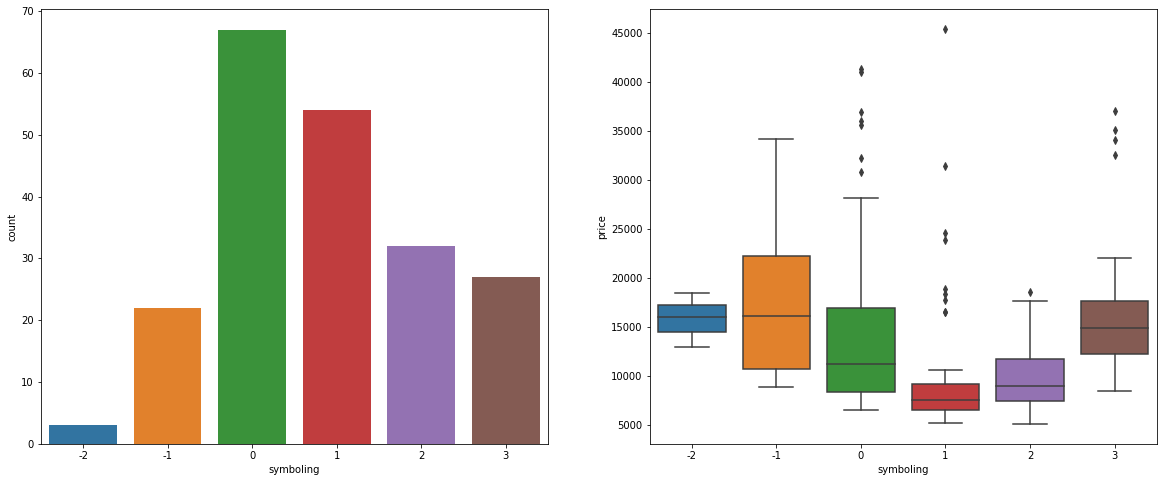

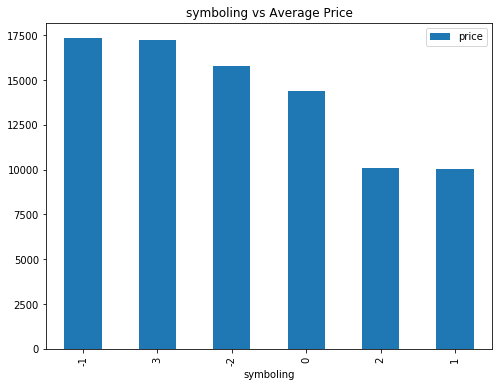

In [92]:
plot_count('symboling')

1. Symboling with 0 and 1 are most sold. <br/>
2. Symboling with -1 are most expensive. <br/>
3. Symboling with 1 and 2 is least expensive.

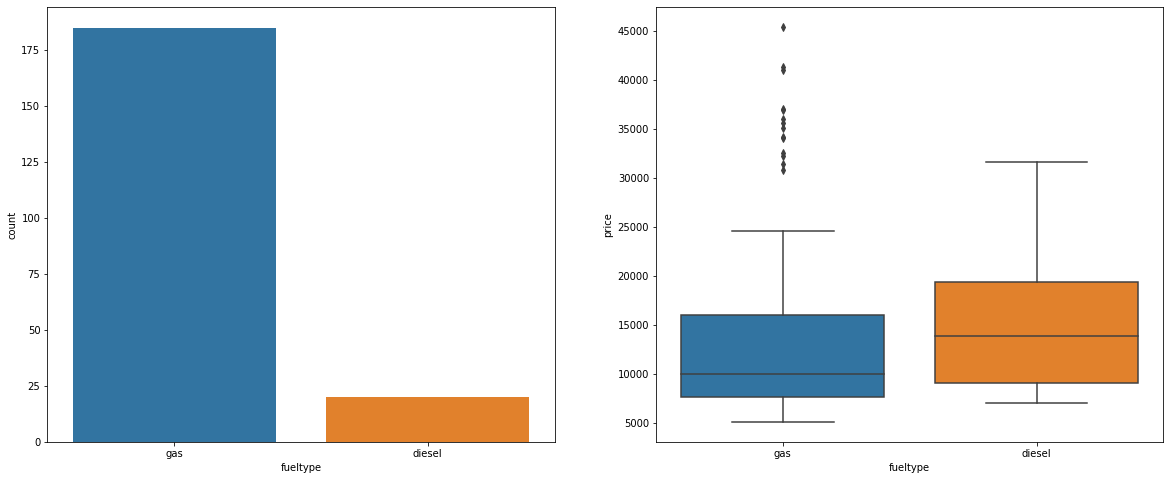

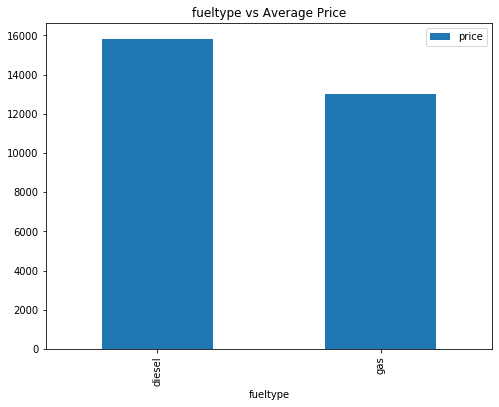

In [93]:
plot_count('fueltype')

1. Diesel engine is more expensive than gas engine but demand of gas engine is far more than diesel engine <br/>
2. That is why diesel engine is not so common

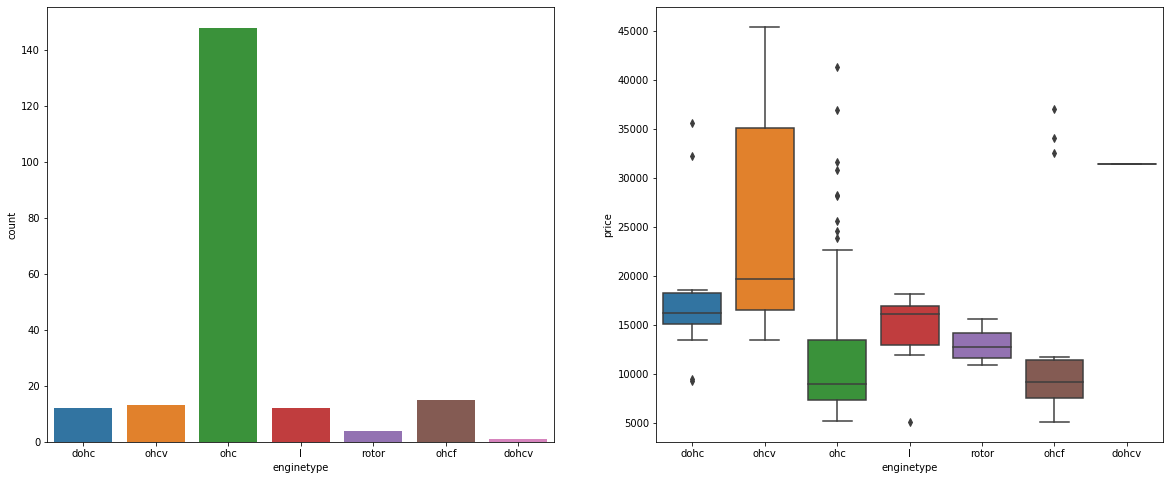

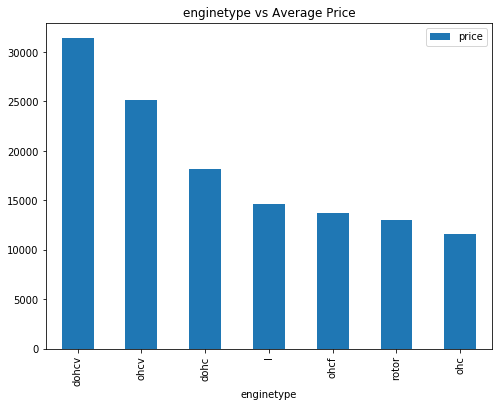

In [94]:
plot_count('enginetype')

1. dohcv and ohcv is most expensive engine type <br/>
2. ohc Engine type seems to be most favored type

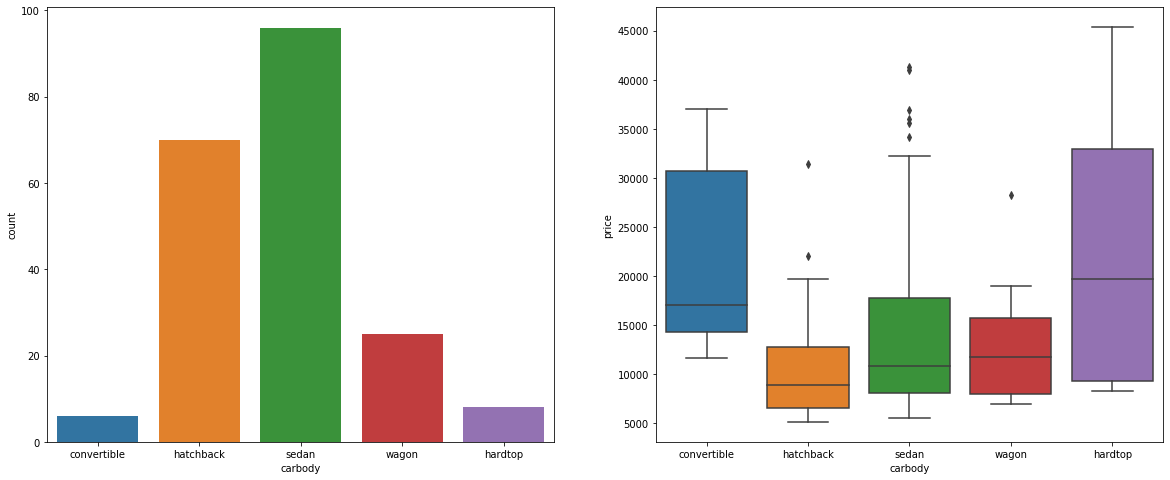

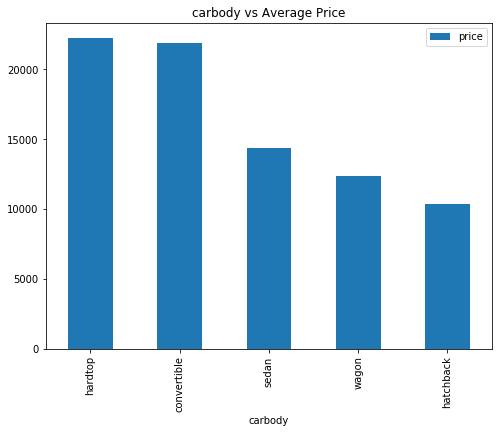

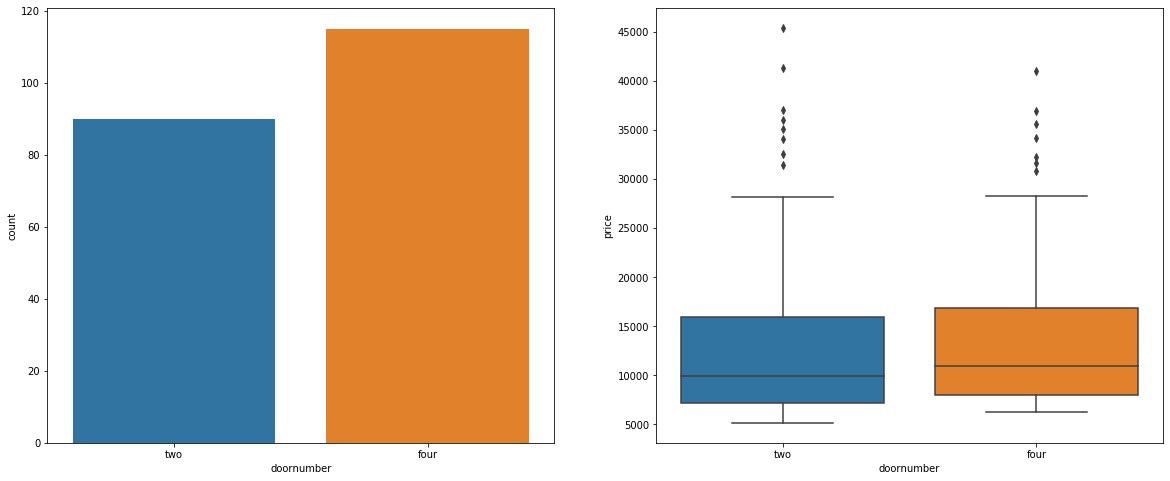

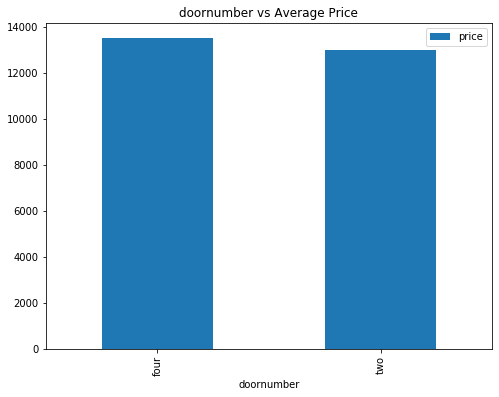

In [95]:
plot_count('carbody')
plot_count('doornumber')

1. Sedan is most favored body type <br/>
2. Hartop and convertible have higher average price </br>
3. Door number is not affecting the price much.

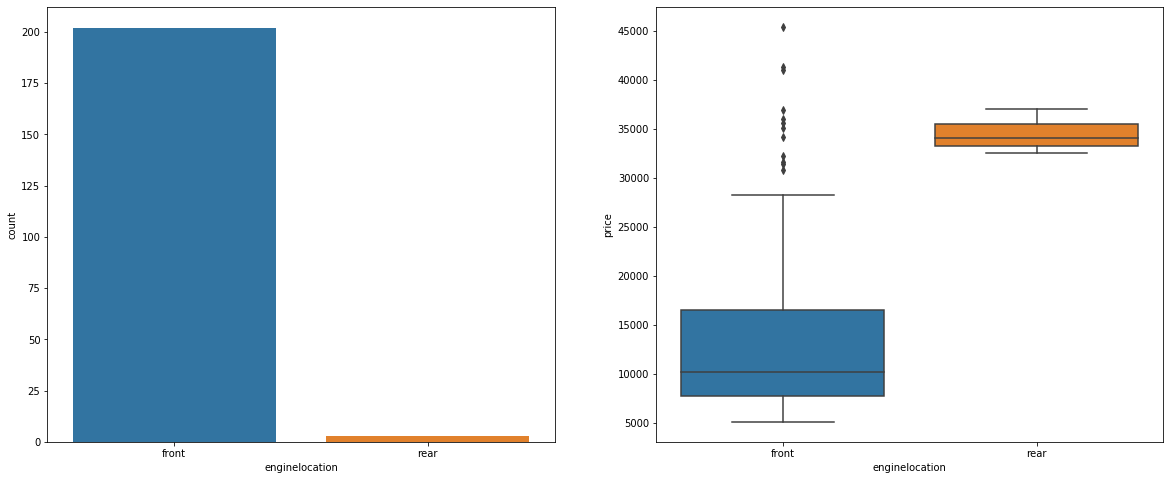

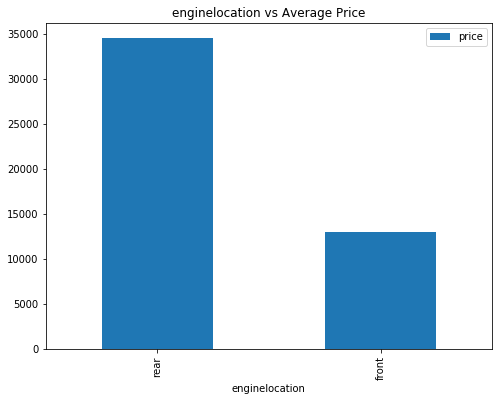

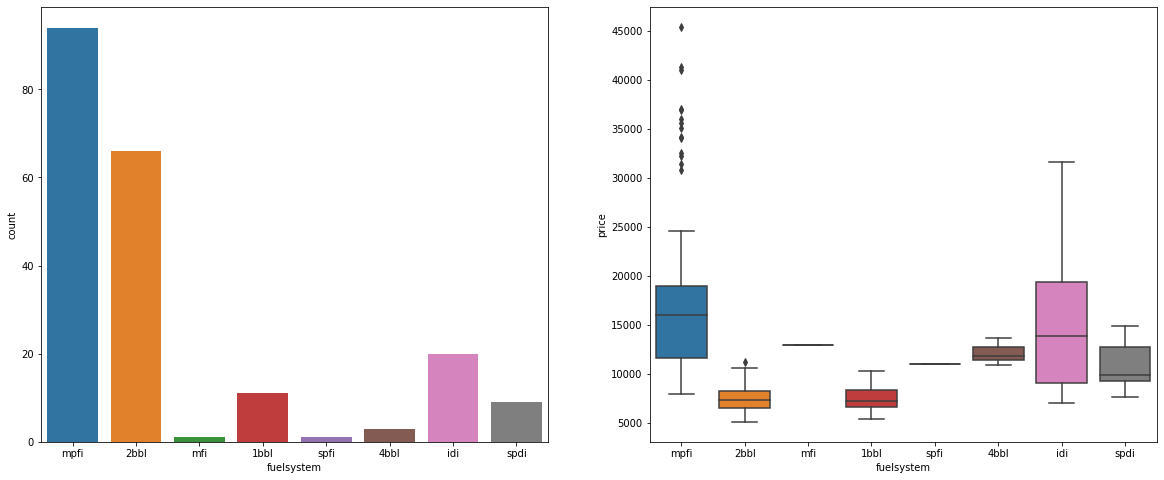

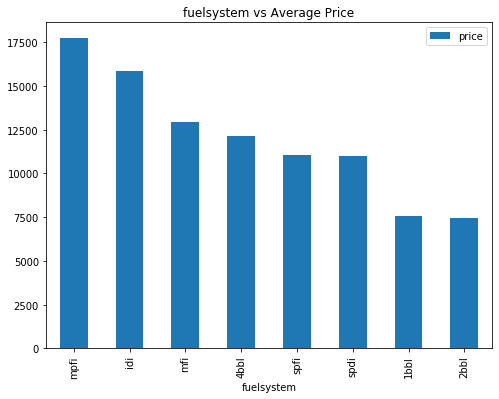

In [96]:
plot_count('enginelocation')
plot_count('fuelsystem')

1. Engine location is not so important for price detection because rear category have very few instance 
2. pfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference. So fuel system can be neglected as well

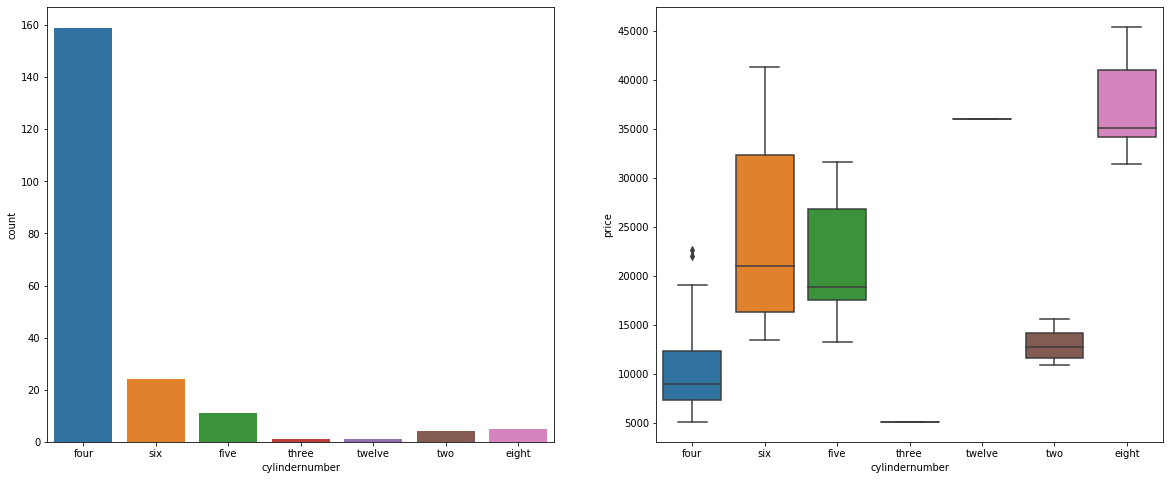

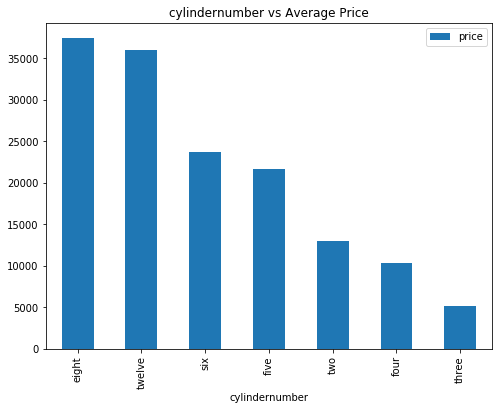

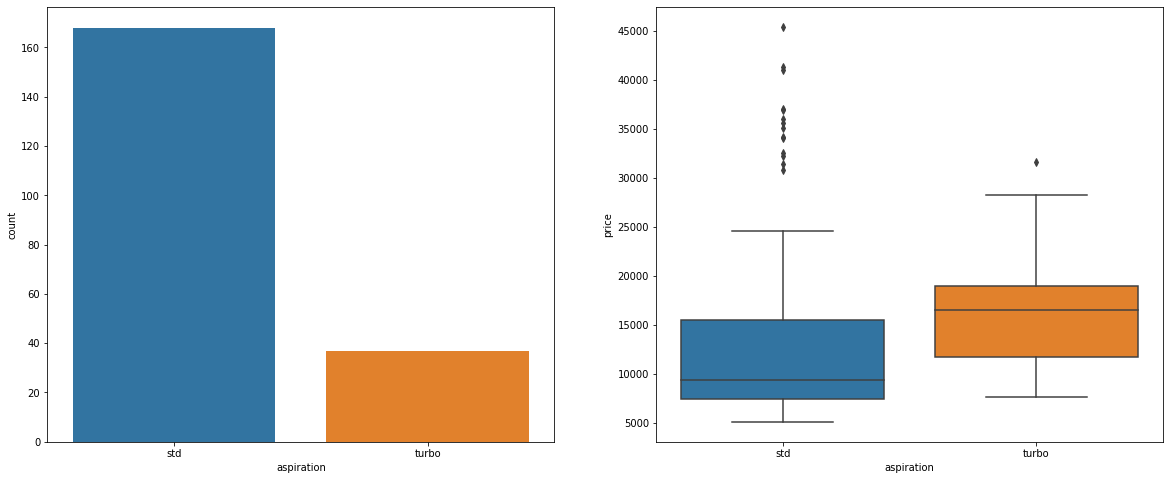

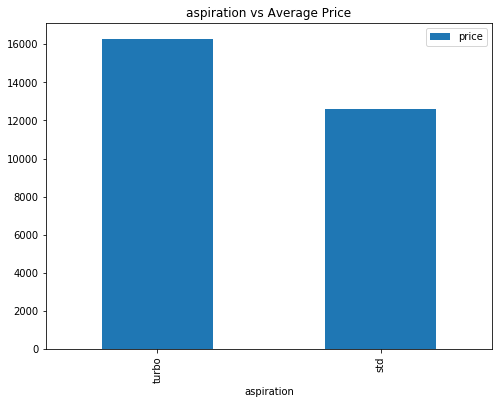

In [97]:
plot_count('cylindernumber')
plot_count('aspiration')


1. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
2. std engine is prefer but turbo engine is more expensive.

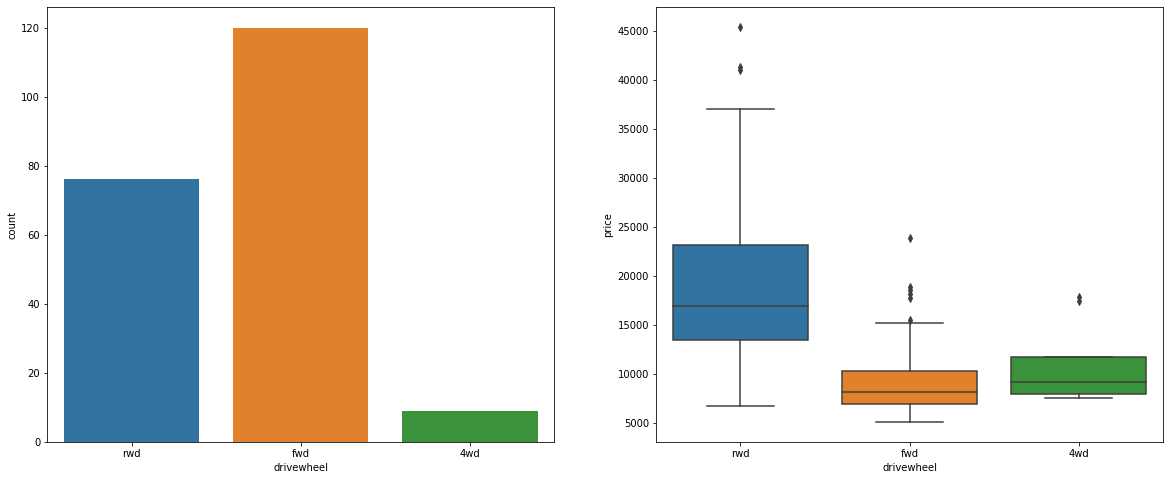

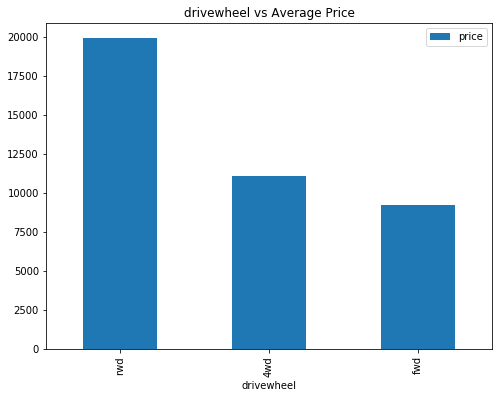

In [101]:
plot_count('drivewheel')

1. rwd is most expensive <br/>
2. 4wd is most prefer

We will drop doornumber, enginelocation and fuelsystem will be dropped 

<h2>Vizualize Numerical Attributes</h2>

In [102]:
correlation['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.697759
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
highwaympg         -0.697599
citympg            -0.722506
Name: price, dtype: float64

C:\Users\muham\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


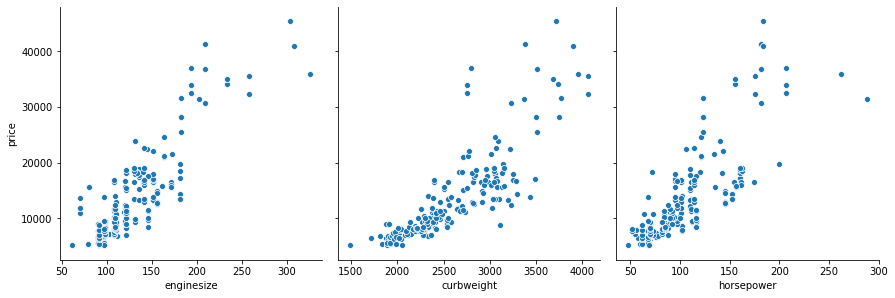

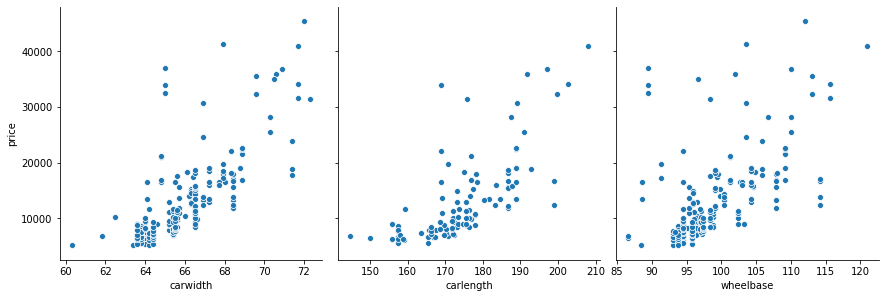

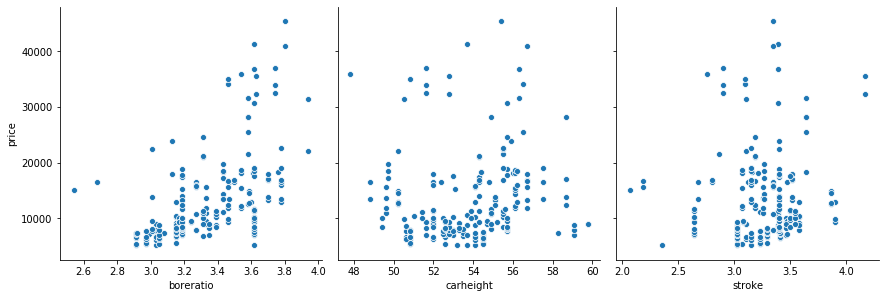

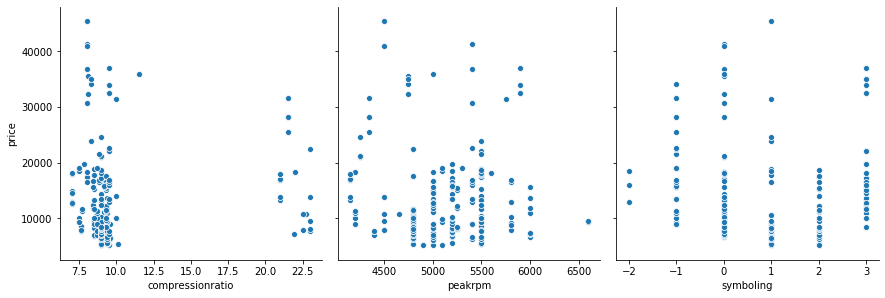

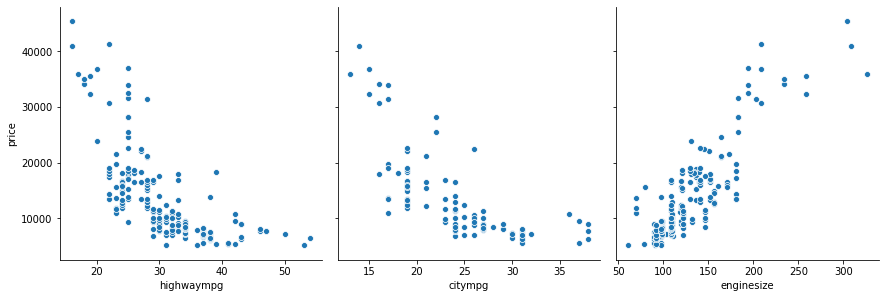

In [103]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize','curbweight','horsepower')
pp('carwidth','carlength','wheelbase')
pp('boreratio','carheight','stroke')
pp('compressionratio','peakrpm','symboling')
pp('highwaympg','citympg','enginesize')

1. Positive Correlation: curbweight,horsepower,carwidth,carlength,wheelbase,boreratio 
2. Negative Correlation: highway mpg and city mpg have negative correlation
3. No Correlation: symboling , peakrpm, compressionratio,stroke,carheight

In [104]:
#introducing new features
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [105]:
#dropping unneccsary attributes from strat_train_set 
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [106]:
cars.drop(['doornumber','enginelocation','fuelsystem','car_ID','citympg','highwaympg','symboling' , 'peakrpm', 'compressionratio','stroke','carheight'],axis = 1,inplace = True)

In [107]:
cars.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'price',
       'fueleconomy'],
      dtype='object')


<h2>Cleaning_Data</h2>

Text(0.5, 1, 'Missing Data')

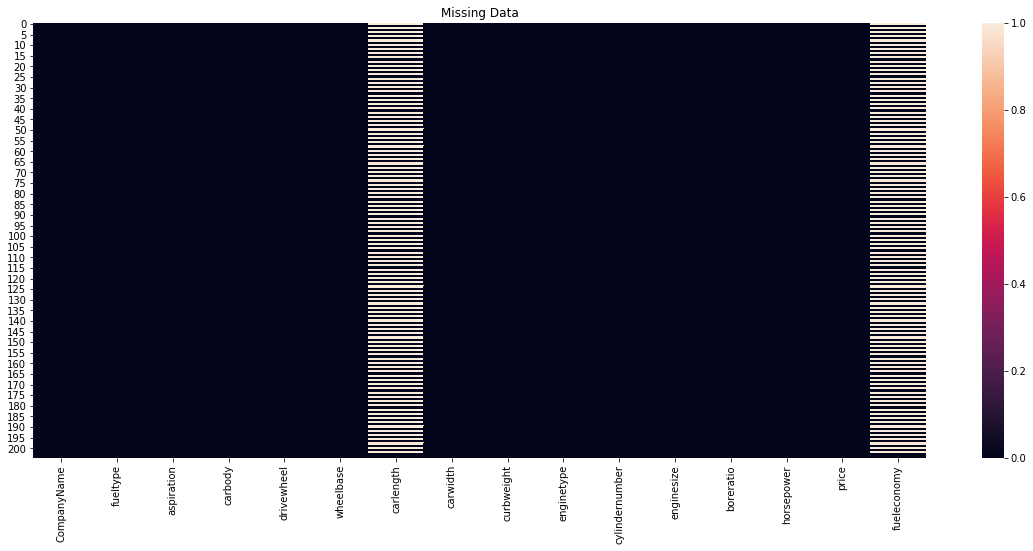

In [108]:
plt.figure(figsize = (20,8))
sns.heatmap(cars.isnull())
plt.title('Missing Data')

In [109]:
cars['carlength'].fillna(cars['carlength'].median(),inplace = True)
cars['fueleconomy'].fillna(cars['fueleconomy'].median(),inplace = True)

Text(0.5, 1, 'Missing Data')

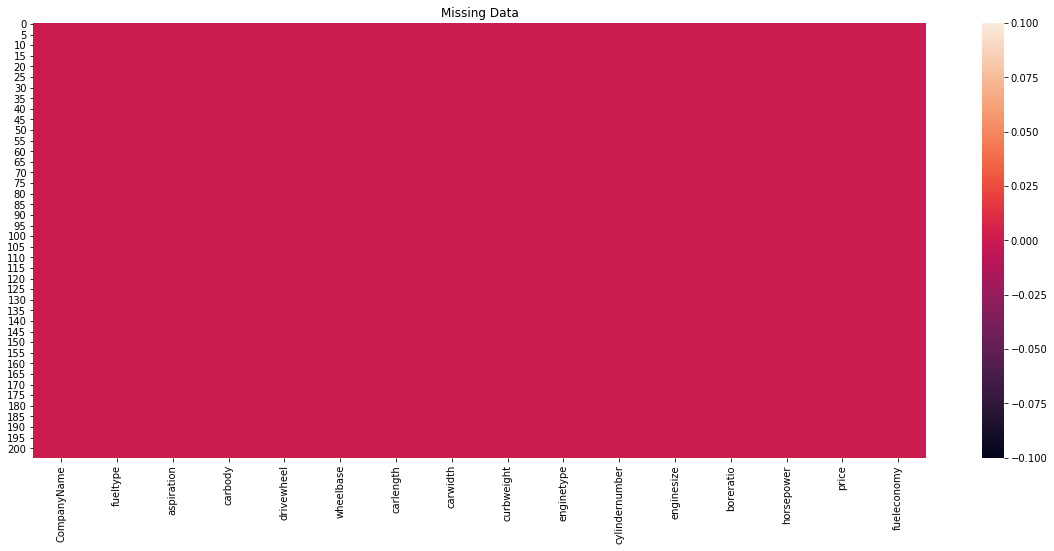

In [110]:
plt.figure(figsize = (20,8))
sns.heatmap(cars.isnull())
plt.title('Missing Data')

In [111]:
cars.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'price',
       'fueleconomy'],
      dtype='object')

In [112]:
#converting categorical variable 
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars = dummies('CompanyName',cars)
cars = dummies('fueltype',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('cylindernumber',cars)

In [113]:
cars.shape

(205, 50)

In [114]:
cars.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'fueleconomy', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two'],
      dtype='object')

<h1>Splitting the data into test and train set</h1>

In [115]:
#random splitting
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

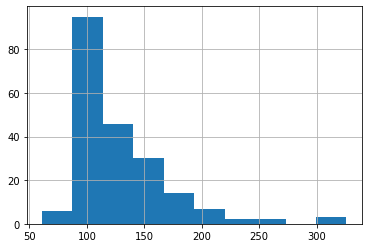

In [116]:
#stratified sampling 
cars['enginesize'].hist()

In [117]:
cars['engine_cat'] = pd.cut(cars['enginesize'],bins=[50,100,150,200,250,np.inf],labels = [1,2,3,4,5])

In [118]:
cars['engine_cat'].value_counts()

2    95
1    66
3    33
4     6
5     5
Name: engine_cat, dtype: int64

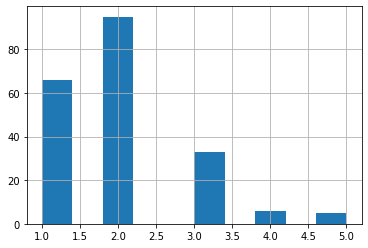

In [119]:
cars['engine_cat'].hist()

In [120]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cars, cars["engine_cat"]):
    strat_train_set = cars.loc[train_index]
    strat_test_set = cars.loc[test_index]

In [121]:
def income_cat_proportions(data):
    return data["engine_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(cars),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [122]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.321951,0.317073,0.365854,13.636364,-1.515152
2,0.463415,0.463415,0.390244,-15.789474,0.000000
3,0.160976,0.170732,0.170732,6.060606,6.060606
4,0.029268,0.024390,0.048780,66.666667,-16.666667
5,0.024390,0.024390,0.024390,0.000000,0.000000


In [123]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("engine_cat", axis=1, inplace=True)

<h2>Building the Model </h2>

In [124]:
print(strat_test_set.shape)
print(strat_train_set.shape)

(41, 50)
(164, 50)


In [125]:
X_strat_train = strat_train_set.drop('price',axis =1)
y_strat_train = strat_train_set['price']

X_strat_test = strat_test_set.drop('price',axis =1)
y_strat_test = strat_test_set['price']

In [126]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_strat_train, y_strat_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
print(lin_reg.intercept_)

-25094.00546336367


In [128]:
predictions = lin_reg.predict(X_strat_test)

In [129]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_strat_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_strat_test, predictions))
print('MSE:', metrics.mean_squared_error(y_strat_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_strat_test, predictions)))

Max Error: 11523.066978894101
MAE: 1568.960764157155
MSE: 6053673.38659617
RMSE: 2460.42138394954


In [130]:
X_random_train = train_set.drop('price',axis =1)
y_random_train = train_set['price']

X_random_test = test_set.drop('price',axis =1)
y_random_test = test_set['price']

In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_random_train, y_random_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
print(lin_reg.intercept_)

-37684.55121196654


In [133]:
predictions = lin_reg.predict(X_random_test)

In [134]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_random_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_random_test, predictions))
print('MSE:', metrics.mean_squared_error(y_random_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_random_test, predictions)))

Max Error: 11560.490179873894
MAE: 2025.700779291212
MSE: 8215161.022924771
RMSE: 2866.210219597434


In [135]:
#MODEL IS DOING BETTER ON STRATIFIED DATA
#lINEAR REGRESSION MODEL IS NOT GOOD ENOUGH SO TRYING ANOTHER MODEL 

In [136]:
#TRYING ANOTHER BUT POWERFUL MODEL CALLED DECISIONTREEREGRESSOR 
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_strat_train, y_strat_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [137]:
predictions = tree_reg.predict(X_strat_test)

In [138]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_random_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_random_test, predictions))
print('MSE:', metrics.mean_squared_error(y_random_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_random_test, predictions)))

Max Error: 33003.0
MAE: 9692.406512195123
MSE: 191119008.2272656
RMSE: 13824.579857169823


In [139]:
#RMSE OF Decision Tree = 13824 
#RMSE OF LINEAR REGRESSION = 2460 
#SO DECISION TREE IS DOING BETTER THAN LINEAR REGRESSION 


<h2>Better Evaluation Using Cross-Validation 

In [140]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,X_strat_train,y_strat_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [141]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2842.24814705 2611.48076208 3450.0462742  1530.28455639 2059.08857265
 1999.73192344 3761.20569308 2170.62876835 3954.54384221 3783.03703147]
Mean: 2816.229557091984
Standard deviation: 829.3469990369593


In [142]:
scores_lin = cross_val_score(lin_reg,X_strat_train,y_strat_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)

In [143]:
display_scores(lin_rmse_scores)

Scores: [1639.18177562 3089.84256041 1593.11121896 2026.38510511 1314.36445557
 2485.89984797 5338.41836328 3162.02716573 2993.10049543 4934.56908849]
Mean: 2857.690007657891
Standard deviation: 1301.0520032834424


In [144]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_strat_train, y_strat_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [145]:
forest_scores = cross_val_score(forest_reg, X_strat_train, y_strat_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1917.25540441 2179.74624559 1472.8882061  1354.00369909 1468.79447119
 1975.99715059 3571.21435982 2268.96850632 2885.58938111 3118.91141718]
Mean: 2221.336884140287
Standard deviation: 714.4549437230455


In [146]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_strat_train, y_strat_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [147]:
SVR_scores = cross_val_score(svm_reg, X_strat_train, y_strat_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1917.25540441 2179.74624559 1472.8882061  1354.00369909 1468.79447119
 1975.99715059 3571.21435982 2268.96850632 2885.58938111 3118.91141718]
Mean: 2221.336884140287
Standard deviation: 714.4549437230455


Mean RMSE of DecisionTree -  2816 <br/>
Mean RMSE of Linear Regression -  2857 <br/>
Mean RMSE of Random Forest -  2221 <br/>
Mean RMSE of SVR -  2221 <br/>

<h2>Fine Tune RANDOMFORESTREGRESSOR
  

In [148]:
#fine tune your RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_strat_train, y_strat_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [149]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [150]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [151]:
#checking score of each hyperparameter combination
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3068.353192178167 {'max_features': 2, 'n_estimators': 3}
3072.0340501198684 {'max_features': 2, 'n_estimators': 10}
3061.143653734498 {'max_features': 2, 'n_estimators': 30}
3278.3183904457596 {'max_features': 4, 'n_estimators': 3}
2914.8084000883537 {'max_features': 4, 'n_estimators': 10}
2774.326498988949 {'max_features': 4, 'n_estimators': 30}
2865.0781991380613 {'max_features': 6, 'n_estimators': 3}
3000.88613884063 {'max_features': 6, 'n_estimators': 10}
2796.6741160410547 {'max_features': 6, 'n_estimators': 30}
2593.027409492515 {'max_features': 8, 'n_estimators': 3}
2665.7874754813115 {'max_features': 8, 'n_estimators': 10}
2555.9404226051465 {'max_features': 8, 'n_estimators': 30}
2889.416264142502 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2936.457647403335 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3366.6372142201185 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2783.4258119118963 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [152]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014928,0.003387,0.003383,0.001396,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-1.341238e+07,-3.030672e+06,...,-9.414791e+06,4.690387e+06,15,-3.015933e+06,-2.545850e+06,-3.754297e+06,-2.999157e+06,-3.261650e+06,-3.115377e+06,394302.579893
1,0.037422,0.007290,0.004805,0.001593,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.043863e+07,-3.661880e+06,...,-9.437393e+06,6.053333e+06,16,-1.787995e+06,-1.831822e+06,-2.109626e+06,-2.736506e+06,-1.482397e+06,-1.989669e+06,423099.934928
2,0.081049,0.008580,0.006976,0.001801,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-1.189332e+07,-3.197307e+06,...,-9.370600e+06,6.095937e+06,14,-1.246734e+06,-1.262361e+06,-1.261135e+06,-1.570561e+06,-1.382660e+06,-1.344690e+06,123137.535643
3,0.010724,0.000796,0.002609,0.001192,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-8.721713e+06,-4.874826e+06,...,-1.074737e+07,5.753576e+06,17,-2.268479e+06,-2.188444e+06,-3.744534e+06,-3.540768e+06,-2.869707e+06,-2.922386e+06,636767.262173
4,0.038055,0.008057,0.004281,0.001386,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-5.226806e+06,-3.375843e+06,...,-8.496108e+06,5.920001e+06,10,-1.584444e+06,-2.006245e+06,-2.217410e+06,-2.704013e+06,-1.551551e+06,-2.012733e+06,428000.997240
5,0.083743,0.006167,0.005932,0.000804,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-6.081808e+06,-2.856400e+06,...,-7.696888e+06,5.492310e+06,5,-9.951846e+05,-1.040717e+06,-9.964334e+05,-1.434105e+06,-1.144115e+06,-1.122111e+06,165139.022551
6,0.011646,0.000827,0.002584,0.001731,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-8.366601e+06,-4.710937e+06,...,-8.208673e+06,2.853603e+06,8,-2.381447e+06,-2.455349e+06,-2.618807e+06,-2.420895e+06,-2.697814e+06,-2.514862e+06,122022.108486
7,0.035457,0.008614,0.003708,0.000601,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-6.162140e+06,-3.130914e+06,...,-9.005318e+06,5.851023e+06,12,-1.677308e+06,-1.867971e+06,-1.561212e+06,-2.016060e+06,-1.804195e+06,-1.785349e+06,156409.281850
8,0.078509,0.004186,0.005025,0.001253,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-6.186182e+06,-1.843134e+06,...,-7.821386e+06,5.346594e+06,7,-1.170010e+06,-1.170067e+06,-1.044193e+06,-1.354813e+06,-1.037102e+06,-1.155237e+06,115373.730110
9,0.012398,0.001473,0.002801,0.000984,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-5.562748e+06,-2.561056e+06,...,-6.723791e+06,4.076793e+06,2,-1.875399e+06,-2.827682e+06,-2.738829e+06,-2.193743e+06,-3.146127e+06,-2.556356e+06,458243.310031


RandomizedSearchCV

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_strat_train, y_strat_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [154]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2644.5940668981475 {'max_features': 7, 'n_estimators': 180}
2487.6554693194184 {'max_features': 5, 'n_estimators': 15}
2880.446380889389 {'max_features': 3, 'n_estimators': 72}
2532.9646444393925 {'max_features': 5, 'n_estimators': 21}
2663.5202858562698 {'max_features': 7, 'n_estimators': 122}
2876.682734641381 {'max_features': 3, 'n_estimators': 75}
2889.283931465564 {'max_features': 3, 'n_estimators': 88}
2634.031900165119 {'max_features': 5, 'n_estimators': 100}
2825.627134319851 {'max_features': 3, 'n_estimators': 150}
3225.370130394238 {'max_features': 5, 'n_estimators': 2}


In [155]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 15}

In [156]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.54385680e-02, 1.12108687e-02, 1.02683045e-01, 1.71149133e-01,
       1.82412004e-01, 6.34590276e-02, 1.32935331e-01, 5.21744416e-02,
       1.43669535e-03, 8.14224717e-03, 1.21069707e-02, 3.70084566e-05,
       2.28297291e-04, 2.02510684e-04, 1.14599314e-04, 5.94706625e-04,
       6.11350864e-04, 8.26797578e-05, 3.20799444e-04, 2.52916193e-03,
       3.04822283e-03, 3.60853810e-04, 1.04914207e-02, 1.71836854e-04,
       2.34021537e-04, 2.84652491e-04, 1.21666255e-03, 7.91269975e-04,
       2.37221254e-03, 1.91345248e-03, 7.34662111e-03, 3.78435733e-03,
       2.07819476e-03, 5.29644391e-03, 3.77743241e-03, 2.00820383e-02,
       3.37700950e-02, 1.42852180e-03, 5.18641470e-04, 4.34615304e-03,
       2.32129971e-04, 9.68796649e-03, 3.63396876e-05, 6.18321889e-03,
       5.15287887e-02, 1.03126229e-02, 2.74815735e-04, 3.89784885e-05,
       5.22588528e-04])

In [157]:
#checking impoertance of each attribute
X_strat_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'fueleconomy', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two'],
      dtype='object')

In [158]:
attribs = list(X_strat_train.columns)
sorted(zip(feature_importances, attribs), reverse=True)

[(0.18241200364409624, 'enginesize'),
 (0.17114913296739423, 'curbweight'),
 (0.1329353307114573, 'horsepower'),
 (0.1026830449802854, 'carwidth'),
 (0.07543856799015132, 'wheelbase'),
 (0.06345902755130788, 'boreratio'),
 (0.052174441574227064, 'fueleconomy'),
 (0.05152878869087288, 'four'),
 (0.033770094986292395, 'rwd'),
 (0.020082038287043698, 'fwd'),
 (0.012106970722032546, 'buick'),
 (0.01121086866106181, 'carlength'),
 (0.010491420728725212, 'porsche'),
 (0.010312622944593449, 'six'),
 (0.009687966487904633, 'ohcv'),
 (0.008142247171742969, 'bmw'),
 (0.00734662110703035, 'turbo'),
 (0.006183218887760874, 'five'),
 (0.005296443911382217, 'sedan'),
 (0.004346153035131997, 'ohc'),
 (0.0037843573304114173, 'hardtop'),
 (0.0037774324145044913, 'wagon'),
 (0.0030482228302572295, 'peugeot'),
 (0.0025291619298033743, 'nissan'),
 (0.002372212535022138, 'volvo'),
 (0.0020781947575444154, 'hatchback'),
 (0.0019134524797389267, 'gas'),
 (0.0014366953505081498, 'audi'),
 (0.00142852179715833

<h2>Evaluate Your System on the Test Set 

In [164]:
#GRIDSEARCHCV
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_strat_test)

In [165]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_strat_test, final_predictions))
print('MAE:', metrics.mean_absolute_error(y_strat_test, final_predictions))
print('MSE:', metrics.mean_squared_error(y_strat_test, final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_strat_test, final_predictions)))

Max Error: 7975.833333333332
MAE: 1400.127776693767
MSE: 4855437.726681041
RMSE: 2203.5057809502205


In [166]:
#RANDOMIZEDSEARCHCV
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_strat_test)

In [167]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_strat_test, final_predictions))
print('MAE:', metrics.mean_absolute_error(y_strat_test, final_predictions))
print('MSE:', metrics.mean_squared_error(y_strat_test, final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_strat_test, final_predictions)))

Max Error: 5256.0999999999985
MAE: 1205.5368569105692
MSE: 2892792.0327946167
RMSE: 1700.8209878745665


In [168]:
#Randomized Search CV work better 

<h2>FINE TUNE SVR

In [169]:
#using GRIDSEARCHCV
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_strat_train, y_strat_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   0.4s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.4s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   1.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   1.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] .

[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=0.1, kernel=rbf ...................................
[CV] .

[CV] ................... C=300.0, gamma=0.3, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=0.3, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 17.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [170]:
grid_search.best_params_

{'C': 1000.0, 'kernel': 'linear'}

In [171]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

3526.8131770145037

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_strat_train, y_strat_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  40.4s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.3s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  33.1s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  13.3s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  18.9s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  18.1s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   0.0s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   0.0s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   0.0s
[CV] C=26290.2

[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  27.8s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  34.9s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  14.6s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  27.9s
[CV] C=171377.39570378003, gamma=0.628789100540856, kernel=linear ....
[CV]  C=171377.39570378003, gamma=0.628789100540856, kernel=linear, total=  42.3s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=  34.8s
[CV] C=5385.293820172355, gamma=0.18696125197741642, kernel=linear ...
[CV]  C=5385.293820172355, gamma=0.18696125197741642, kernel=linear, total=  23.2

[CV]  C=761.4316758498783, gamma=2.6126336514161914, kernel=linear, total=  17.2s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  30.1s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  25.7s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  16.5s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  27.9s
[CV] C=97392.81883041795, gamma=0.09265545895311562, kernel=linear ...
[CV]  C=97392.81883041795, gamma=0.09265545895311562, kernel=linear, total=  43.8s
[CV] C=2423.0759984939164, gamma=3.248614270240346, kernel=linear ....
[CV]  C=2423.0759984939164, gamma=3.248614270240346, kernel=linear, total=  2

[CV]  C=251.14073886281363, gamma=0.8238105204914145, kernel=linear, total=  14.0s
[CV] C=251.14073886281363, gamma=0.8238105204914145, kernel=linear ...
[CV]  C=251.14073886281363, gamma=0.8238105204914145, kernel=linear, total=  17.7s
[CV] C=251.14073886281363, gamma=0.8238105204914145, kernel=linear ...
[CV]  C=251.14073886281363, gamma=0.8238105204914145, kernel=linear, total=   3.1s
[CV] C=251.14073886281363, gamma=0.8238105204914145, kernel=linear ...
[CV]  C=251.14073886281363, gamma=0.8238105204914145, kernel=linear, total=   3.7s
[CV] C=251.14073886281363, gamma=0.8238105204914145, kernel=linear ...
[CV]  C=251.14073886281363, gamma=0.8238105204914145, kernel=linear, total=  10.9s
[CV] C=60.17373642891687, gamma=1.2491263443165994, kernel=linear ....
[CV]  C=60.17373642891687, gamma=1.2491263443165994, kernel=linear, total=   1.4s
[CV] C=60.17373642891687, gamma=1.2491263443165994, kernel=linear ....
[CV]  C=60.17373642891687, gamma=1.2491263443165994, kernel=linear, total=   

[CV]  C=6287.039489427172, gamma=0.3504567255332862, kernel=linear, total=  15.6s
[CV] C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf .......
[CV]  C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf, total=   0.0s
[CV] C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf .......
[CV]  C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf, total=   0.0s
[CV] C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf .......
[CV]  C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf, total=   0.0s
[CV] C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf .......
[CV]  C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf, total=   0.0s
[CV] C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf .......
[CV]  C=61217.04421344494, gamma=1.6279689407405564, kernel=rbf, total=   0.0s
[CV] C=926.9787684096649, gamma=2.147979593060577, kernel=rbf ........
[CV]  C=926.9787684096649, gamma=2.147979593060577, kernel=rbf, total=   0.0s
[CV] C=926.97876840

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 666.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029538E776C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029538E77348>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [176]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

3327.4472891775035

In [177]:
rnd_search.best_params_

{'C': 629.782329591372, 'gamma': 3.010121430917521, 'kernel': 'linear'}

<h2>Evaluate Your System on the Test Set 

In [178]:
#GRIDSEARCHCV
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_strat_test)

In [179]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_strat_test, final_predictions))
print('MAE:', metrics.mean_absolute_error(y_strat_test, final_predictions))
print('MSE:', metrics.mean_squared_error(y_strat_test, final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_strat_test, final_predictions)))

Max Error: 17014.68330895354
MAE: 2494.4289421367816
MSE: 15868959.021842616
RMSE: 3983.5862011311638


In [180]:
#RANDOMIZEDSEARCHCV
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(X_strat_test)

In [181]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(y_strat_test, final_predictions))
print('MAE:', metrics.mean_absolute_error(y_strat_test, final_predictions))
print('MSE:', metrics.mean_squared_error(y_strat_test, final_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_strat_test, final_predictions)))

Max Error: 15212.588258273372
MAE: 2046.5453723829628
MSE: 12097829.108251894
RMSE: 3478.1933684388355
